                             ANALISIS DE DATOS - VIDEOJUEGOS
                             

IMPORTAMOS LIBRERIA


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('vgsales.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


TRANSFORMACION DE DATOS

In [59]:
## RELLENA VALORES NAN CON EL PROMEDIO DE LAS COLUMNA
promedio=df['Year'].mean()
df['Year'].fillna(promedio, inplace=True)

/tmp/ipython-input-3205956745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(promedio, inplace=True)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [57]:
##CAMBIAMOS TIPO DE DATO
df['Year']=df['Year'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [58]:
df['Publisher'].fillna("NO HAY DIRECTOR")

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
...,...
16593,Kemco
16594,Infogrames
16595,Activision
16596,7G//AMES


EXTRAEMOS EL ARCHIVO CSV  CON LOS DATOS LIMPIOS

In [13]:
df2=df.copy()

In [14]:
df2.to_csv('datolimpio.csv')

In [15]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


ANALISIS CON LOS DATOS LIMPIOS

In [16]:
#CALCULAMOS LA CANTIDAD DE VIDEJUEGOS POR GENERO
df['Genre'].value_counts().reset_index(name="cantidad").sort_values(by='cantidad', ascending=False).head(5)

,Genre,cantidad
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310


In [17]:
venta_genero_europa=df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).reset_index(name="venta total Europa").head(5)
data1=venta_genero_europa.rename(columns={'Genre':'Genero'})
data1['venta total Europa']='S/ ' + data1['venta total Europa'].round(2).astype(str)
data1



,Genero,venta total Europa
0,Action,S/ 525.0
1,Sports,S/ 376.85
2,Shooter,S/ 313.27
3,Racing,S/ 238.39
4,Misc,S/ 215.98


In [18]:
#TOP 5 DE LAS MEJORES VENTAS POR GENERO EN NA
top_5_venta_total_america=df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(5)
top_5_venta_total_america

,NA_Sales
Genre,
Action,877.83
Sports,683.35
Shooter,582.60
Platform,447.05
Misc,410.24


In [19]:
##TOP 5 DE LAS MEJORES VENTAS POR GENERO EN JP
venta_japan=df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(5)
venta_japan
#

,JP_Sales
Genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76


In [20]:
###TOP 5 DE LAS MEJORES VENTAS POR GENERO EN OTRAS REGIONES
venta_otros=df.groupby('Genre')['Other_Sales'].sum().reset_index(name='venta').sort_values(by='venta',ascending=False).head(5)
venta_otros

,Genre,venta
0,Action,187.38
10,Sports,134.97
8,Shooter,102.69
6,Racing,77.27
3,Misc,75.32


In [92]:
ventas_genero_region = df.pivot_table(
    index='Genre',
    values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    aggfunc='sum'
).reset_index()
ventas_genero_region

,Genre,EU_Sales,JP_Sales,NA_Sales,Other_Sales
0,Action,525.00,159.95,877.83,187.38
1,Adventure,64.13,52.07,105.80,16.81
2,Fighting,101.32,87.35,223.59,36.68
3,Misc,215.98,107.76,410.24,75.32
4,Platform,201.63,130.77,447.05,51.59
5,Puzzle,50.78,57.31,123.78,12.55
6,Racing,238.39,56.69,359.42,77.27
7,Role-Playing,188.06,352.31,327.28,59.61
8,Shooter,313.27,38.28,582.60,102.69
9,Simulation,113.38,63.70,183.31,31.52


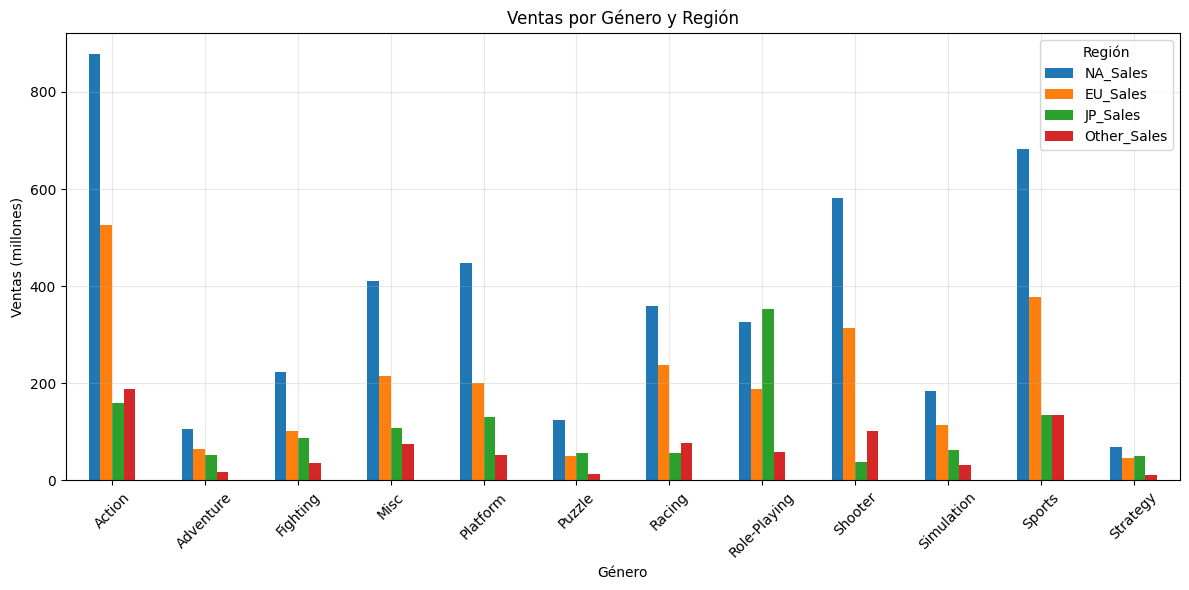

In [95]:
ventas_genero_region.plot(
    x='Genre',
    y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    kind='bar',
    figsize=(12,6)
)

plt.title("Ventas por Género y Región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Género")
plt.xticks(rotation=45)
plt.legend(title="Región", loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
##EL PROMEDIO DE LA VENTAS TOTALES
venta_total=df['Global_Sales'].sum()
print(f"la venta total es : {venta_total} Dolares")

la venta total es : 8920.44 Dolares


In [24]:
#EL NOMBRE DEL VIDEOJUEGO CON LA MAYOR VENTA TOTAL
maximo = df.loc[[df['Global_Sales'].idxmax()], ['Name','Global_Sales']].reset_index(drop=True)
maximo


,Name,Global_Sales
0,Wii Sports,82.74


In [25]:
##EL NOMBRE DEL VIDEOJUEGO CON LA MENOR VENTA TOTAL
minimo=df.loc[[ df['Global_Sales'].idxmin()],['Name','Global_Sales']]
minimo['Global_Sales']='S/ '+ minimo['Global_Sales'].astype(str)
minimo

,Name,Global_Sales
15980,Turok,S/ 0.01


In [27]:
años_venta = (
    df.groupby('Year')['Global_Sales']
      .sum()
      .reset_index(name="Ventas totales")
      .sort_values(by='Year', ascending=True)
)

años_venta


,Year,Ventas totales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


Text(0, 0.5, 'Ventas totales (millones)')

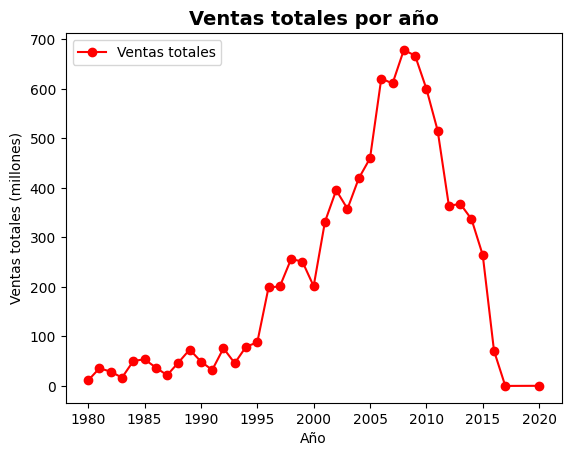

In [66]:


ax=años_venta.plot(x='Year', y='Ventas totales', kind='line',marker='o',color='red')

ax.set_xticks(range(int(años_venta['Year'].min()), int(años_venta['Year'].max()) + 1, 5))
ax.tick_params(axis='x', rotation=0)
ax.set_title("Ventas totales por año", fontsize=14, fontweight="bold")
ax.set_xlabel("Año")
ax.set_ylabel("Ventas totales (millones)")

In [30]:
# promedio por peliculas
promedio_pelia=df.groupby('Platform')['NA_Sales'].mean().sort_values(ascending=False).head(5)
promedio_pelia

,NA_Sales
Platform,
NES,1.285102
GB,1.166531
GEN,0.713704
2600,0.681203
X360,0.475138


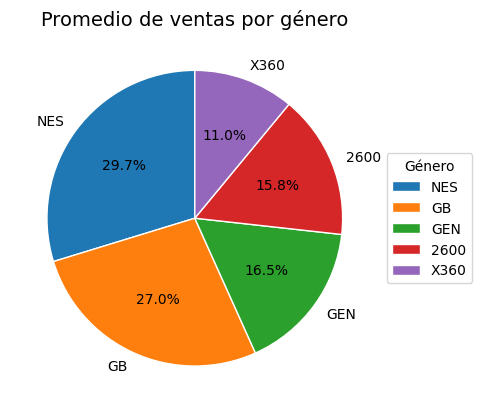

In [67]:
ax = promedio_pelia.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

ax.set_ylabel("")
ax.set_title("Promedio de ventas por género", fontsize=14)
plt.xticks(rotation=0)
plt.ylabel("")
plt.legend(
    title="Género",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.show()

In [68]:
resumen=df[df['Year']<=2016].groupby(['Year','Genre'])['Global_Sales'].sum().unstack().fillna(0)
resumen.head(2)


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.0,0.77,2.71,0.00,0.00,0.00,0.0,7.07,0.00,0.49,0.0
1981,14.84,0.0,0.00,0.00,6.93,2.24,0.48,0.0,10.04,0.45,0.79,0.0


In [69]:
resumen2=resumen.divide(resumen.sum(axis=1),axis=0)*100
resumen2.head(2)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,2.987698,0.0,6.766257,23.813708,0.000000,0.000000,0.000000,0.0,62.126538,0.000000,4.305800,0.0
1981,41.487280,0.0,0.000000,0.000000,19.373777,6.262231,1.341907,0.0,28.068214,1.258037,2.208555,0.0


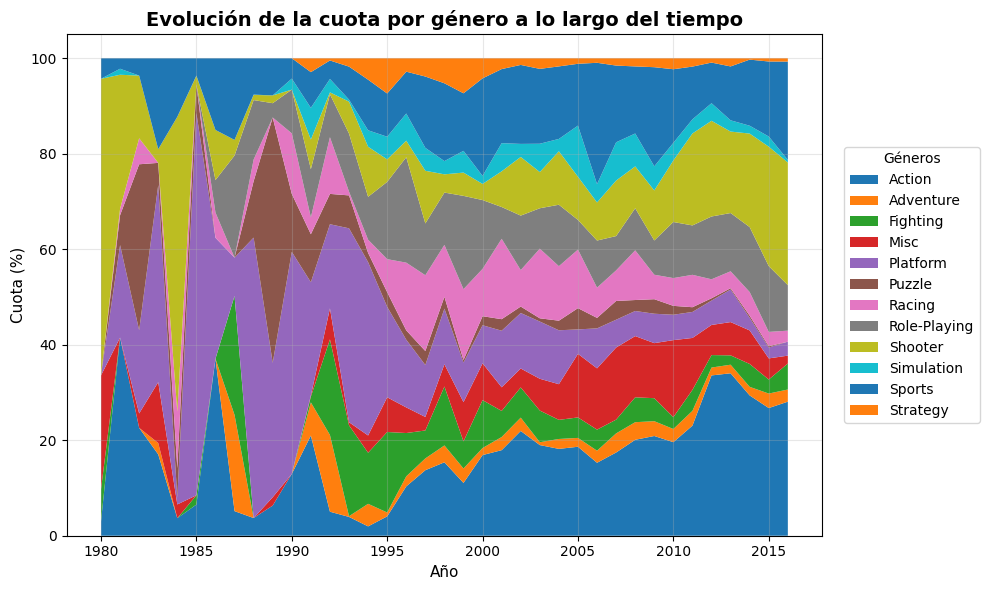

In [70]:

plt.figure(figsize=(10,6))
plt.stackplot(
    resumen2.index,
    resumen2.T,
    labels=resumen2.columns
)
plt.title("Evolución de la cuota por género a lo largo del tiempo", fontsize=14, fontweight="bold")
plt.xlabel("Año", fontsize=11)
plt.ylabel("Cuota (%)", fontsize=11)

plt.legend(
    title="Géneros",
    loc="center left",
    bbox_to_anchor=(1.02,0.5),

)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
dpivot=df[df['Platform'].isin(['PS3','PS4'])].copy()
dpivot

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
...,...,...,...,...,...,...,...,...,...,...,...
16480,16483,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
16521,16524,Akatsuki no Goei Trinity,PS3,2012,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16541,16544,Battle Fantasia,PS3,2008,Fighting,505 Games,0.00,0.00,0.01,0.00,0.01
16550,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [41]:
pivot=dpivot.pivot_table(
    index='Year',
    columns='Platform',
    values='Global_Sales',
    aggfunc='sum'
    ).fillna(0)
pivot.sort_index(ascending=True)

Platform,PS3,PS4
Year,,
2006,29.56,0.00
2007,73.81,0.00
2008,119.69,0.00
2009,132.34,0.00
2010,144.42,0.00
2011,159.37,0.00
2012,109.49,0.00
2013,117.39,24.76
2014,50.96,98.76


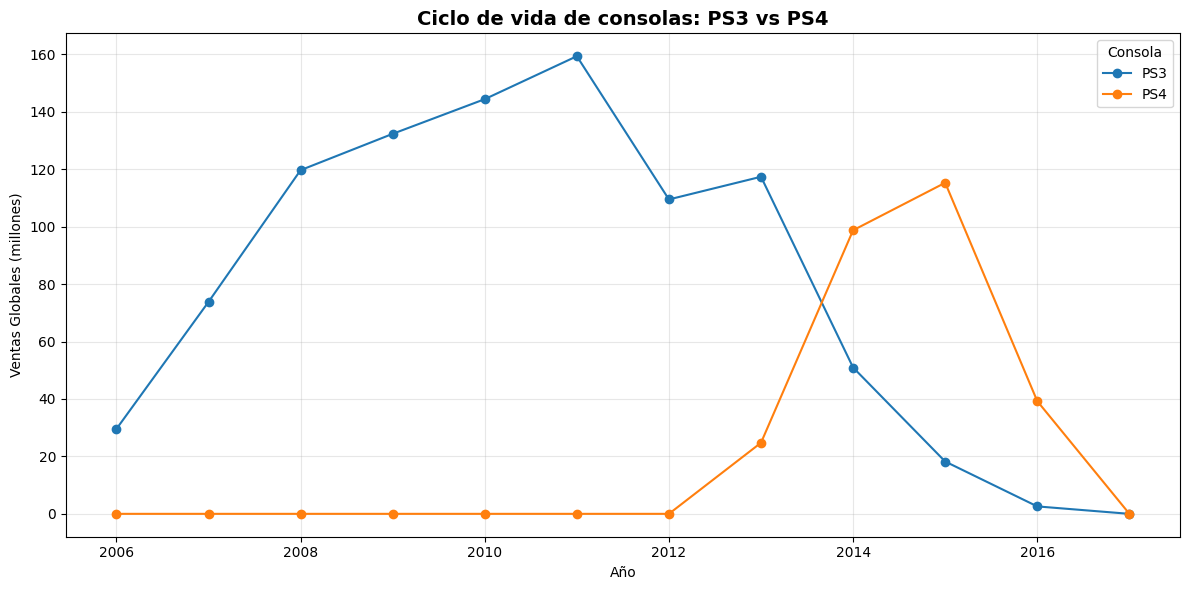

In [42]:
pivot.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Ciclo de vida de consolas: PS3 vs PS4", fontsize=14, fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.grid(True, alpha=0.3)
plt.legend(title="Consola", loc="upper right")

plt.tight_layout()
plt.show()

In [76]:
correlation=df[['NA_Sales','JP_Sales']].corr()

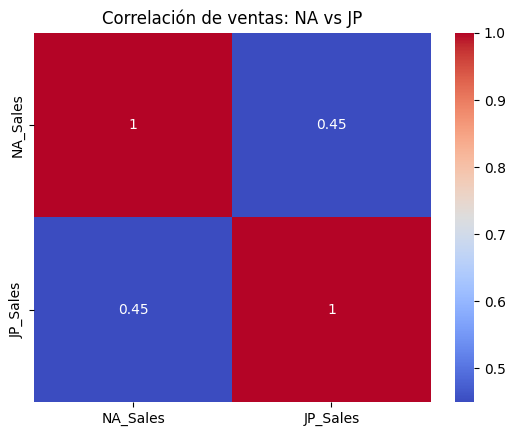

In [77]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlación de ventas: NA vs JP")
plt.show()

EFICIENCIA DE LOS PUBLISHER

In [50]:
dfsuce=df.copy()

In [72]:
dfsuce['calidad']=dfsuce['Global_Sales'].apply(lambda x : 1 if x>0.5374406555006628 else 0)

In [74]:
eficiencia = dfsuce.groupby('Publisher')['calidad'].mean().reset_index()
top_publishers=eficiencia.sort_values(by='calidad', ascending=False).head(3)
top_publishers

#

,Publisher,calidad
576,"mixi, Inc",1.0
554,Wizard Video Games,1.0
552,Westwood Studios,1.0
